In [3]:
#This is a sample code as i dont have the data yet
import numpy as np
data = np.loadtxt("C:\Abhinav\Course\CN\Downloaded NB\Linear Regression\data.csv", delimiter = ",") #by default delimiter is space

#data.shape() gives (100,2)

x = data[:,0].reshape(-1,1) #this is done to make it a 2d array as sklearn doesnt accept 1d array for features
y = data[:,1]



In [9]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y) #75% split by default

from sklearn.linear_model import LinearRegression
#We cant use 1d features for training on this
alg = LinearRegression()
alg.fit(x_train,y_train)

m = alg.coef_ #this gives the slope
c = alg.intercept_ #this gives the intercept

print(m,c,end = " ")


[1.3852036] 4.71482114249892 

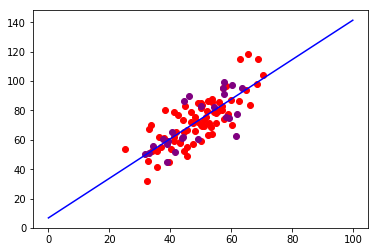

In [8]:
#Now we want to plot
import matplotlib.pyplot as plt
x_line = np.arange(0,100,0.1)
y_line = x_line*m + c
plt.scatter(x_train.reshape(75),y_train,color = "red")
plt.plot(x_line,y_line,color = "blue")
#plt.scatter(x_test.reshape(25),y_test,color="purple")
plt.show()

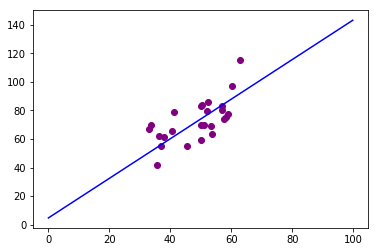

In [10]:
#plot test with line

x_line = np.arange(0,100,0.1)
y_line = x_line*m + c
plt.plot(x_line,y_line,color = "blue")
plt.scatter(x_test.reshape(25),y_test,color="purple")
plt.show()

In [11]:
#to score our performance we will use coefficient of determination which is 1-(u/v) where u is sigma(yi(true) - yi(pred))^2 and
# v is sigma(yi(true) - yi(mean of true))^2 , we want score to be between 0 and 1 (higher is better) .... it can be -ve as well
#this gives 0 when we predict ymean as ypred for all predictions , as u=v in that case , best score is 1 when ypred = ytrue for all

#we have a function in sklearn that gives this score automatically to us
print(alg.score(x_train,y_train)) # this will give a value b/w 0 and 1
print(alg.score(x_test,y_test))

0.6398973463862185
0.41935008751845354


Error function or cost function , we dont use sum of errors , as positive and negative  cancel out each other ,
for the case of sum of absolute (mod) values of errors is because linear punishment is not acceptable for huge errors , 
2 small is always better than 1 huge error which cant be seen in linear sum , hence squared error is used

Now we will code our own Linear Regression , This will be based on the 2 formulas - 
We take derivative of the mean squared error cost function wrt m and c separately(partial derivatives), equate both of them to 0 , then calculate the values of both of them.
we get - m = ((x*y)mean-(x)mean*(y)mean)/((x*x)mean - (x)mean*(x)mean)
also c = (y)mean - m*(x)mean , where value of x is shown above

In [15]:
#This is the practice problem
import numpy as np
data = np.loadtxt("C:\Abhinav\Course\CN\Downloaded NB\Linear Regression/train.csv", delimiter = ",")
#print(data.shape)
x = data[:,0:10]
y = data[:,10]
from sklearn import model_selection
x_train,x_test,y_train,y_test =  model_selection.train_test_split(x,y)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

print(model.score(x_test,y_test))
print(model.score(x_train,y_train))

0.5124171389424788
0.4659233530797943
